### The goal of this portion of the project is to find whether age at seperation from the Army played a role in career outcomes.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
import seaborn as sns

age_group = pd.read_csv('veoa.csv')
age_group.head()

,cohort,cohort_years,agegrp,y1_emp,y5_emp,y10_emp,y1_nonemp,y5_nonemp,y10_nonemp,y1_p25_earnings,...,y10_p75_earnings,status_y1_emp,status_y5_emp,status_y10_emp,status_y1_nonemp,status_y5_nonemp,status_y10_nonemp,status_y1_earn,status_y5_earn,status_y10_earn
0,0,16,E00,312300,262900.0,155000.0,342900,168900.0,84120.0,23330,...,75520.0,1,1,1,1,1,1,1,1,1
1,0,16,E01,89800,89510.0,60930.0,125700,67890.0,34970.0,19490,...,68890.0,1,1,1,1,1,1,1,1,1
2,0,16,E02,222800,173300.0,94160.0,217200,101000.0,49150.0,25840,...,79470.0,1,1,1,1,1,1,1,1,1
3,2000,2,E00,51230,57090.0,54930.0,33180,27080.0,28730.0,23930,...,76290.0,1,1,1,1,1,1,1,1,1
4,2002,2,E00,36400,45460.0,44720.0,33570,24320.0,24750.0,21810,...,72830.0,1,1,1,1,1,1,1,1,1


In [2]:
age_group = age_group[11:]
age_group = age_group[['cohort', 'agegrp','y1_emp','y1_nonemp']]
age_group = age_group.reset_index(drop=True)
# print(age_group.info())
age_group.head(10)

,cohort,agegrp,y1_emp,y1_nonemp
0,2000,E01,16050,14420
1,2000,E02,35270,18800
2,2002,E01,14870,17720
3,2002,E02,21650,15870
4,2004,E01,17150,16540
5,2004,E02,33340,19670
6,2006,E01,12760,12860
7,2006,E02,32040,19480
8,2008,E01,6536,16420
9,2008,E02,22980,27750


## Question: Does seperating from the Army at a young age have a negative impact on soldier's employment prospects?

In [3]:
age_group['ratio'] = age_group['y1_emp'] / age_group['y1_nonemp']
age_group['agegrp'] = age_group['agegrp'].replace(to_replace=['E01', 'E02'], value=['under 25', '25 and older'])
age_group.head(10)

,cohort,agegrp,y1_emp,y1_nonemp,ratio
0,2000,under 25,16050,14420,1.113037
1,2000,25 and older,35270,18800,1.876064
2,2002,under 25,14870,17720,0.839165
3,2002,25 and older,21650,15870,1.364209
4,2004,under 25,17150,16540,1.036880
5,2004,25 and older,33340,19670,1.694967
6,2006,under 25,12760,12860,0.992224
7,2006,25 and older,32040,19480,1.644764
8,2008,under 25,6536,16420,0.398051
9,2008,25 and older,22980,27750,0.828108


In [4]:
agegrp_df = age_group.groupby('agegrp').sum()
# agegrp_df = agegrp_df.reset_index()
agegrp_df = agegrp_df[['y1_emp','y1_nonemp']]
agegrp_df.head()

,y1_emp,y1_nonemp
agegrp,,
25 and older,222630,217220
under 25,89848,125667


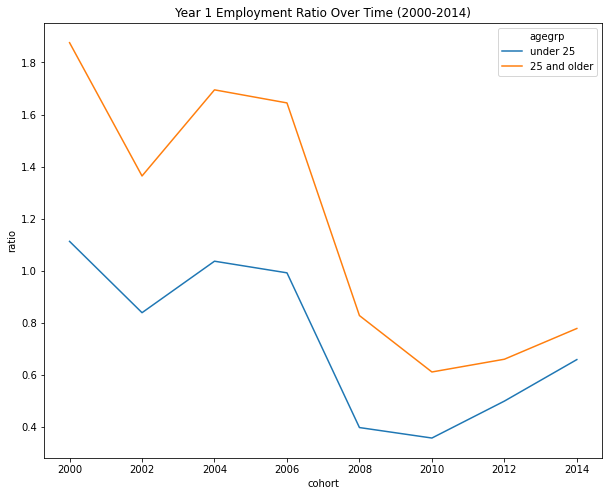

In [5]:
plt.figure(figsize=(10,8))
sns.lineplot(data=age_group, x='cohort', y='ratio', hue='agegrp')
plt.title('Year 1 Employment Ratio Over Time (2000-2014)')
# plt.legend(['<25', '25+'])
plt.show()

## Question: What can be some causes for the the sharp decrease in employment that occurs around 2007?

In [7]:
us_emp = pd.read_csv("US unemployment.csv")

us_emp = us_emp[['Year', 'Period', 'Label', 'Value', '1-Month Net Change']]
us_emp.head()

,Year,Period,Label,Value,1-Month Net Change
0,2000,M01,2000 Jan,128992,-2642
1,2000,M02,2000 Feb,129655,663
2,2000,M03,2000 Mar,130751,1096
3,2000,M04,2000 Apr,131749,998
4,2000,M05,2000 May,132705,956


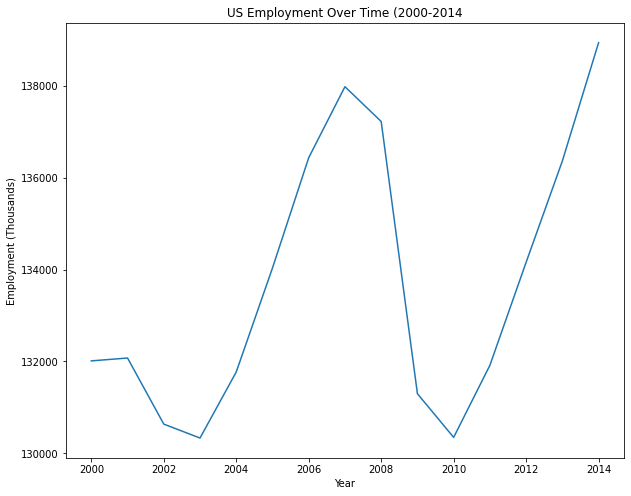

In [11]:
plt.figure(figsize=(10,8))
sns.lineplot(data=us_emp, x='Year', y='Value', ci=None)
plt.title('US Employment Over Time (2000-2014')
plt.ylabel('Employment (Thousands)')
plt.show()